In [1]:
import os
import PIL
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
os.listdir('/content/drive/MyDrive/datasetv')

['real', 'fake']

In [14]:
data=[]
label=[]
for i in os.listdir('/content/drive/MyDrive/datasetv'):
    train_class=os.listdir(os.path.join('/content/drive/MyDrive/datasetv',i))
    for j in train_class:
        img=os.path.join('/content/drive/MyDrive/datasetv',i,j)
        data.append(img)
        label.append(i)
print("total number of images={}".format(len(data)))
data

total number of images=2884


['/content/drive/MyDrive/datasetv/real/id2_0009_0.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_1.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_2.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_3.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_4.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_5.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_6.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_7.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_8.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_9.png',
 '/content/drive/MyDrive/datasetv/real/id2_0009_10.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_0.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_1.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_2.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_3.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_4.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002_5.png',
 '/content/drive/MyDrive/datasetv/real/id4_0002

<bound method Figure.tight_layout of <Figure size 2000x2000 with 4 Axes>>

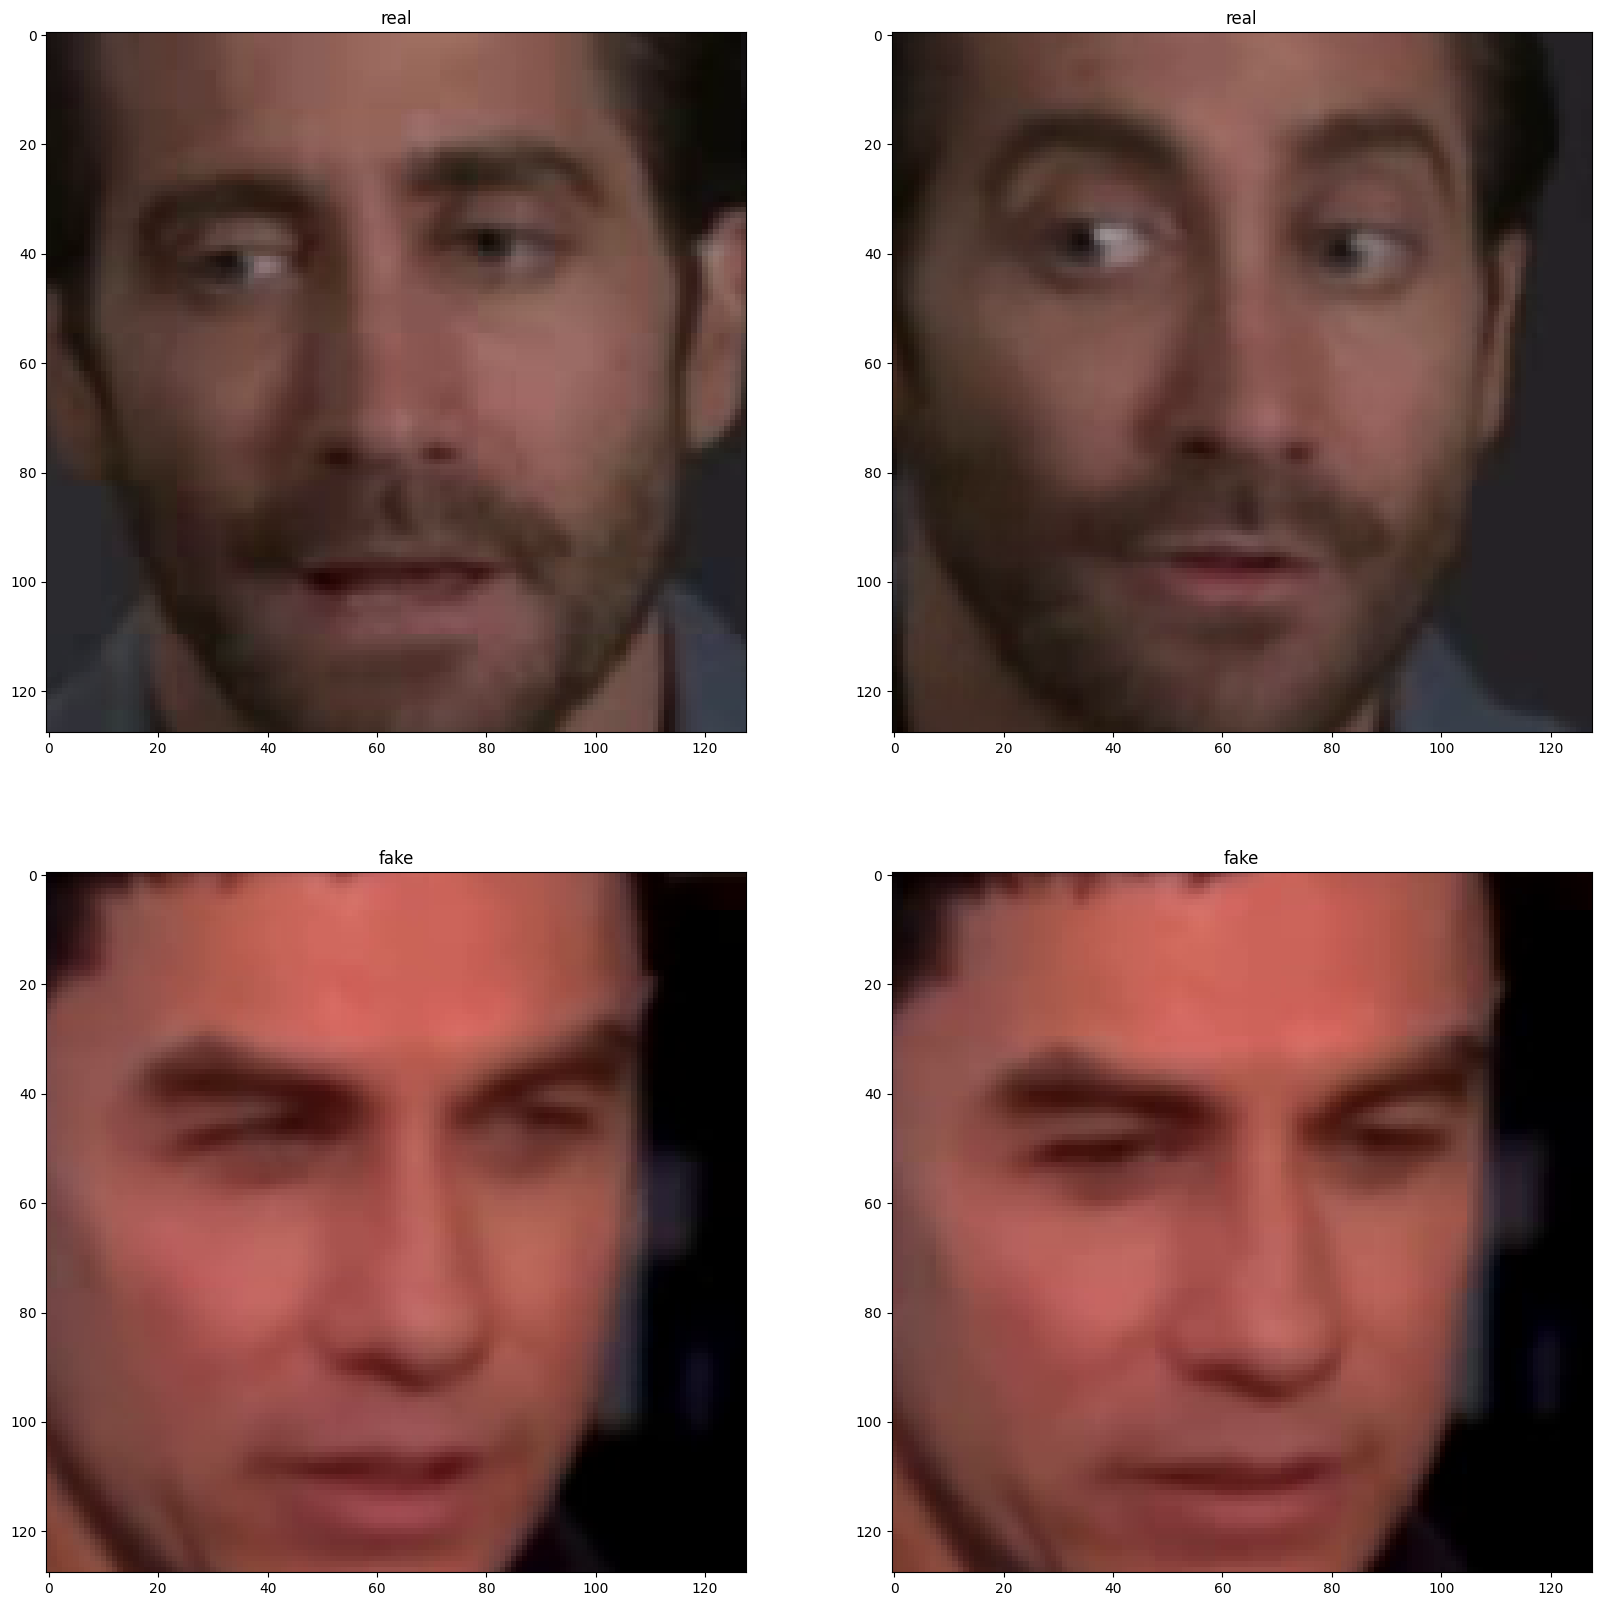

In [17]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
count=0
for i in os.listdir('/content/drive/MyDrive/datasetv'):
    train_class=os.listdir(os.path.join('/content/drive/MyDrive/datasetv',i))
    for j in range(2):
        img=os.path.join('/content/drive/MyDrive/datasetv',i,train_class[j])
        img=PIL.Image.open(img)
        axs[count%2][j].title.set_text(i)
        axs[count%2][j].imshow(img)
    count+=1
fig.tight_layout

In [18]:
dr28_df=pd.DataFrame({'Image':data, 'Label':label})
dr28_df

,Image,Label
0,/content/drive/MyDrive/datasetv/real/id2_0009_...,real
1,/content/drive/MyDrive/datasetv/real/id2_0009_...,real
2,/content/drive/MyDrive/datasetv/real/id2_0009_...,real
3,/content/drive/MyDrive/datasetv/real/id2_0009_...,real
4,/content/drive/MyDrive/datasetv/real/id2_0009_...,real
...,...,...
2879,/content/drive/MyDrive/datasetv/fake/id0_id21_...,fake
2880,/content/drive/MyDrive/datasetv/fake/id0_id21_...,fake
2881,/content/drive/MyDrive/datasetv/fake/id0_id21_...,fake
2882,/content/drive/MyDrive/datasetv/fake/id0_id21_...,fake


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset',
    target_size=(128, 128),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 3900 images belonging to 26 classes.


In [10]:
labels={0:'fake',1:'real'}

In [11]:
model = load_model('/content/drive/MyDrive/deepfake-detection-model1.h5')

In [12]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [28]:
from sklearn.metrics import classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []
count = 0
for i in range(len(dr28_df)):
  img= PIL.Image.open(dr28_df['Image'].tolist()[i])
  img = img.resize((128,128))
  image.append(img)
  img = np.asarray(img, dtype= np.float32)
  img = img / 255
  img = img.reshape(-1,128,128,3)
  # predict = model.predict(img)
  # predict = np.argmax(predict)
  predict=model.predict(img)
  prediction_threshold = 0.5
  if predict >= prediction_threshold:
        predicted_class = 1
  else:
        predicted_class = 0
  prediction.append(labels[predicted_class])
  original.append(dr28_df['Label'].tolist()[i])

1/1 [==============================] - 0s 44ms/step


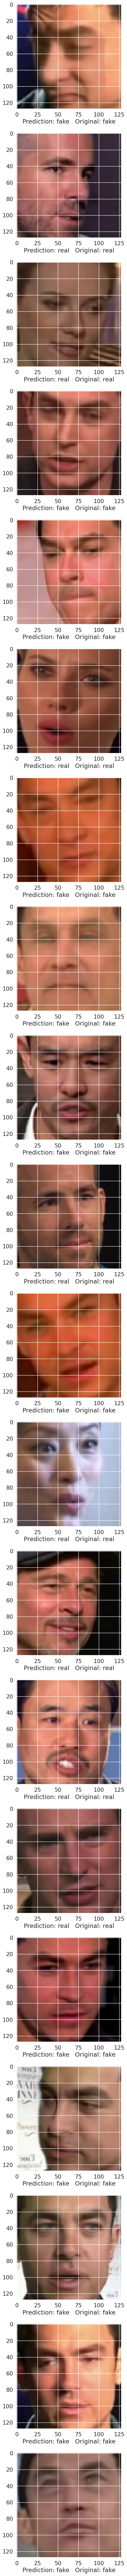

In [37]:
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [30]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

        fake       0.87      0.99      0.93      1479
        real       0.99      0.85      0.91      1405

    accuracy                           0.92      2884
   macro avg       0.93      0.92      0.92      2884
weighted avg       0.93      0.92      0.92      2884



In [23]:
from sklearn.metrics import confusion_matrix

True positive =  1463
False positive =  16
False negative =  211
True negative =  1194




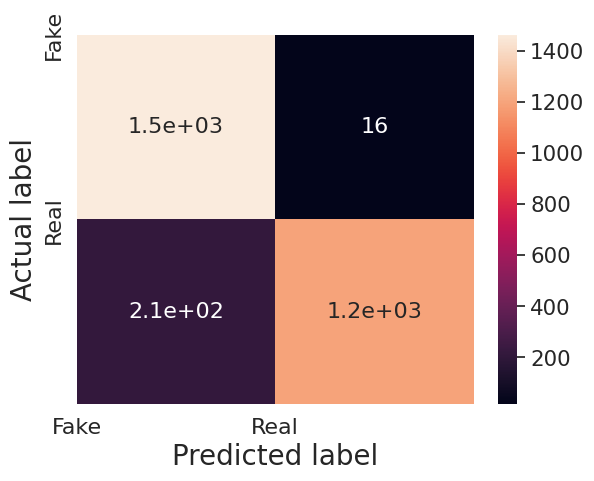

In [33]:
import seaborn as sn
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print('\n')
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.ylim([2, 0])
plt.show()